<a href="https://colab.research.google.com/github/rudra-web01/House-Price-Prediction/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/data (1).csv")

In [ ]:
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.shape

(4600, 18)

In [ ]:
x = df[['sqft_living']]
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train , y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

array([ 364098.33163107,  508399.10707922,  759589.34582231,
        561843.83872669,  433576.48277277,  727522.50683383,
        540465.9460677 ,  532449.23632058,  527104.76315584,
        537793.70948533,  783639.47506367,  227814.26593003,
        834411.97012876,  535121.47290296,  398837.40720192,
        756917.10923994,  692783.43126298,  690111.19468061,
        882512.22861148,  954662.61633556,  724850.27025146,
        703472.37759247,  604599.62404466,  511071.3436616 ,
        195747.42694155,  182386.24402969,  674077.77518637,
        818378.55063452,  332031.49264259,  652699.88252738,
       1633410.70825837,  299964.65365411, 1221886.27457289,
        588566.20455042,  273242.28783038,  543138.18265008,
        871823.28228199,  962679.32608268,  294620.18048936,
        585893.96796805,  422887.53644328,  374787.27796056,
        516415.81682634,  462971.08517888,  310653.5999836 ,
        324014.78289547,  487021.21442024,  543138.18265008,
        818378.55063452,

In [ ]:
X_test

,sqft_living
3683,1460
4411,2000
2584,2940
69,2200
1844,1720
...,...
1612,1700
1068,1930
4350,1180
3027,2370


In [ ]:
y_test

,price
3683,544000.0
4411,0.0
2584,1712500.0
69,365000.0
1844,275000.0
...,...
1612,750000.0
1068,230000.0
4350,26590000.0
3027,687000.0


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2 = r2_score(y_test ,y_pred)

In [ ]:
r2

0.029065410341410414

In [ ]:
m = lr.coef_
m

array([267.22365824])

In [ ]:
c = lr.intercept_
c

np.float64(-26048.2093954297)

In [ ]:
m *4.0  + c

array([-24979.31476248])

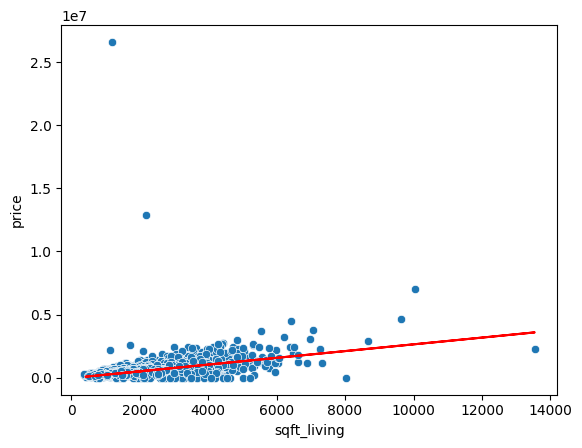

In [ ]:
sns.scatterplot(x = 'sqft_living' , y = 'price' , data = df)
plt.plot(X_test , lr.predict(X_test) , color = 'red')

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print('MSE: ', mean_squared_error(y_test , y_pred))

MSE:  990204087727.1417
